<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series EDA

_Author: Unknown_

----
This lab will walk you through performing exploratory data analysis on a dataset of weekly chickenpox cases from Hungary. This dataset is from the UCI Machine Learning Repository. You can read more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Hungarian+Chickenpox+Cases).

-----

### Imports

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
# Only using one county
pox = pd.read_csv('data/hungary_chickenpox.csv')[['Date', 'BUDAPEST']]

# Renaming columns for readability
pox.columns = ['date', 'budapest_cases']
pox.head(3)

,date,budapest_cases
0,03/01/2005,168
1,10/01/2005,157
2,17/01/2005,96


**Check the dataframe dtypes**

In [53]:
pox.dtypes

date              object
budapest_cases     int64
dtype: object

**Check for nulls**

In [54]:
pox.isnull().sum()

date              0
budapest_cases    0
dtype: int64

**Casting the `'Date'` column to a datetime type**

Use `pd.to_datetime` to convert the `Date` column to a datetime.

**WARNING**: The date column is formated as day-month-year. Does `pd.to_datetime` work the way you expect it to on day/month/year strings? If it doesn't work the way you expect it to, check [the documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) for `pd.to_datetime`, and see if one of the settings fixes things.

In [55]:
pox['date'] = pd.to_datetime(pox['date'], format='%d/%m/%Y')

**Set the `'Date'` column to be the index**

In [56]:
pox.set_index('date',inplace=True)

In [57]:
pox.head()

,budapest_cases
date,
2005-01-03,168
2005-01-10,157
2005-01-17,96
2005-01-24,163
2005-01-31,122


---

Now that our data is formatted appropriately, we can embark on EDA.

### Summary statistics

**What times does the dataset describe?**

That is, what's the earliest date in the dataset, and what's the latest date?

In [58]:
print(f'Earliest Date: {pox.index[0]}')
print(f'Latest Date:   {pox.index[-1]}')

Earliest Date: 2005-01-03 00:00:00
Latest Date:   2014-12-29 00:00:00


**Plot a histogram of the Budapest cases column**

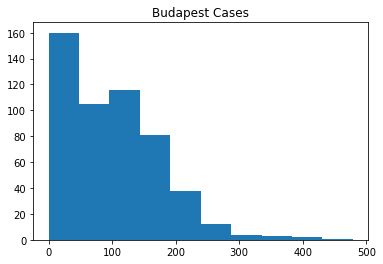

In [59]:
plt.hist(pox)
plt.title('Budapest Cases');

**How many cases were there per year?**

Recall that with time series data, we can't simply group by on the year. You'll need to use the `resample` method on the DataFrame to answer this question.

In [60]:
pox_y = pox.resample('Y').mean()
pox_y

,budapest_cases
date,
2005-12-31,87.730769
2006-12-31,124.961538
2007-12-31,119.075472
2008-12-31,85.403846
2009-12-31,106.288462
2010-12-31,100.423077
2011-12-31,103.923077
2012-12-31,101.000000
2013-12-31,99.173077


### Visualizations

**Make a line plot of chickenpox cases**

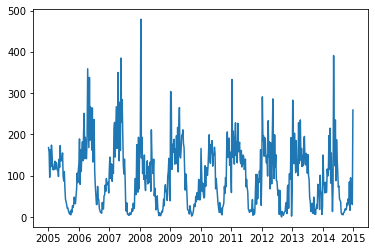

In [108]:
plt.plot(pox)

**In short answer format, describe any apparent trends**

In [68]:
# Down trend

### Plot rolling averages

Plot the weekly chickenpox cases, but on the same graph, also plot the 4-week and 12-week rolling averages.

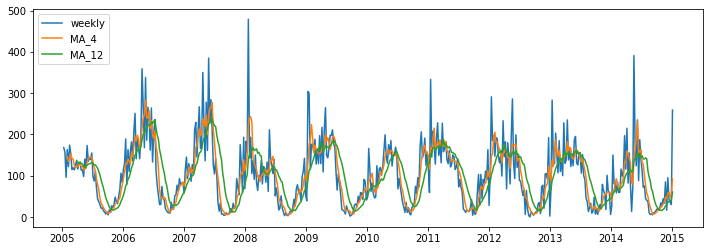

In [105]:
pox_w  = pox.resample('W').mean()
pox_4  = pox_w.rolling(4).mean()
pox_12 = pox_w.rolling(12).mean()

plt.figure(figsize=(12,4))
plt.plot(pox_w, label='weekly')
plt.plot(pox_4, label='MA_4')
plt.plot(pox_12,label='MA_12')
plt.legend();

### Plot yearly chickenpox cases

You may need to use `resample` again for this.

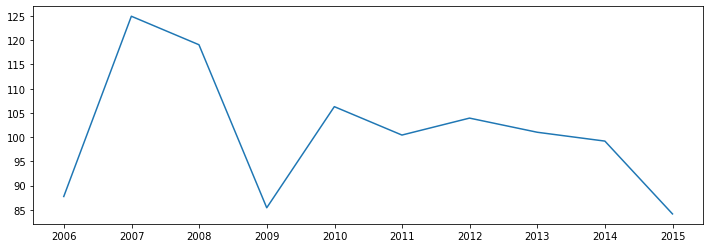

In [112]:
pox_y  = pox.resample('Y').mean()

plt.figure(figsize=(12,4))
plt.plot(pox_y);